In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
len(df.Surname.unique())

2932

In [4]:
df1 = df.drop(['CustomerId','Surname','RowNumber'],axis = 1)
df1.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

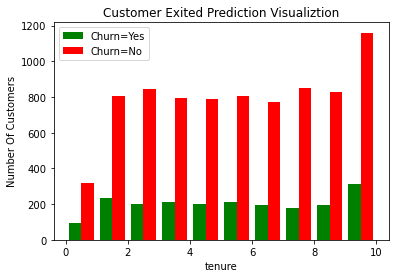

In [7]:
tenure_Exited_no = df1[df1.Exited == 0].Tenure
tenure_Exited_yes = df1[df1.Exited == 1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([tenure_Exited_yes, tenure_Exited_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [8]:
df1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

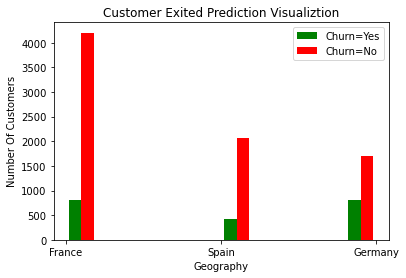

In [9]:
Geography_Exited_no = df1[df1.Exited == 0].Geography
Geography_Exited_yes = df1[df1.Exited == 1].Geography

plt.xlabel("Geography")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([Geography_Exited_yes, Geography_Exited_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

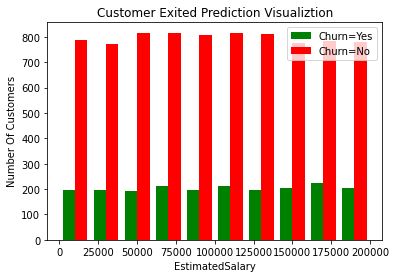

In [10]:
EstimatedSalary_Exited_no = df1[df1.Exited == 0].EstimatedSalary
EstimatedSalary_Exited_yes = df1[df1.Exited == 1].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([EstimatedSalary_Exited_yes, EstimatedSalary_Exited_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df1['Gender'].replace({'Female' : 1 , 'Male' : 0},inplace = True)
df1.Gender.unique()

array([1, 0], dtype=int64)

In [13]:
df2 = pd.get_dummies(df1,columns = ['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
df2['Age'] = df2['Age'] / 100
df2.Age.describe()

count    10000.000000
mean         0.389218
std          0.104878
min          0.180000
25%          0.320000
50%          0.370000
75%          0.440000
max          0.920000
Name: Age, dtype: float64

In [15]:
df2.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [16]:
df2['CreditScore'] = df2['CreditScore'] / 1000
df2.CreditScore.describe()

count    10000.000000
mean         0.650529
std          0.096653
min          0.350000
25%          0.584000
50%          0.652000
75%          0.718000
max          0.850000
Name: CreditScore, dtype: float64

In [17]:
df2.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [18]:
df2['Tenure'] = df2['Tenure'] / 10
df2.Tenure.describe()

count    10000.000000
mean         0.501280
std          0.289217
min          0.000000
25%          0.300000
50%          0.500000
75%          0.700000
max          1.000000
Name: Tenure, dtype: float64

In [19]:
col_for_scaling = ['EstimatedSalary','Balance']

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df2[col_for_scaling] = sc.fit_transform(df2[col_for_scaling])

In [20]:
for col in col_for_scaling:
    print(df2[col].describe())

count    10000.000000
mean         0.500441
std          0.287580
min          0.000000
25%          0.254977
50%          0.500960
75%          0.746955
max          1.000000
Name: EstimatedSalary, dtype: float64
count    10000.000000
mean         0.304848
std          0.248696
min          0.000000
25%          0.000000
50%          0.387402
75%          0.508749
max          1.000000
Name: Balance, dtype: float64


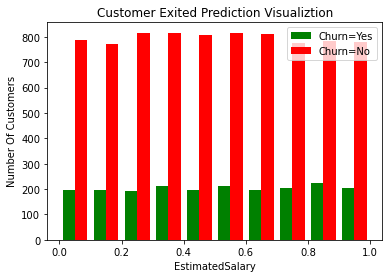

In [21]:
EstimatedSalary_Exited_no = df2[df2.Exited == 0].EstimatedSalary
EstimatedSalary_Exited_yes = df2[df2.Exited == 1].EstimatedSalary

plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([EstimatedSalary_Exited_yes, EstimatedSalary_Exited_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
x = df2.drop(['Exited'],axis = 1)
y = df2['Exited']

In [23]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.619,1,0.42,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.608,1,0.41,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.502,1,0.42,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.699,1,0.39,0.1,0.000000,2,0,0,0.469120,1,0,0
4,0.850,1,0.43,0.2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.771,0,0.39,0.5,0.000000,2,1,0,0.481341,1,0,0
9996,0.516,0,0.35,1.0,0.228657,1,1,1,0.508490,1,0,0
9997,0.709,1,0.36,0.7,0.000000,1,0,1,0.210390,1,0,0
9998,0.772,0,0.42,0.3,0.299226,2,1,0,0.464429,0,1,0


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [26]:
x_train.shape

(8000, 12)

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (12,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4610 - accuracy: 0.8006
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8271
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8436
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8501
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8519
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8533
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8561
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8585
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8559
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3425 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8849
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8864
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8863
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.8844
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.8851
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.8844
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.8839
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8866
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.8890
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 

In [29]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 950us/step - loss: 0.4178 - accuracy: 0.8435


[0.41779252886772156, 0.843500018119812]

In [30]:
y_predicted = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [31]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
y_pred[10:20]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [34]:
y_test[10:20]

4737    0
4691    0
6016    0
5376    0
9366    0
2481    0
3909    0
7533    1
212     0
1461    0
Name: Exited, dtype: int64